## Analyze coverage_matrix. Either create coverage_matrix from scratch or load from csv

In [12]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
from cnv import utilities as cnv_util
from cnv import coverage_matrix as cm
import pandas as pd
from genepeeks.common import utilities as util
import pysam
%matplotlib inline

#### Create coverage_matrix_df

In [34]:
reload(cnv_util)
reload(cm)
targets = cnv_util.combine_panel_intervals()
bamfiles_fofn = '/Users/msilver/Dropbox (GenePeeks)/Max_workspace/dmd/cnv/inputs/bamfile_paths.fofn'
matrix_instance = cm.CoverageMatrix()
cm_df = matrix_instance.create_coverage_matrix(bamfiles_fofn, targets)

TSO only: 1659 intervals over 356192 bp
TSID only: 122 intervals over 135550 bp

Creating coverage_matrix with 6 subjects
------------------------------------------------------------


Returned 1247 merged intervals after merging 412 of them within 629 of each other
Returned 114 merged intervals after merging 8 of them within 629 of each other


Time per 1 unit/s: 2.95 sec, Counts: 1/6
TE: 2.95 sec, ETR: 14.75 sec, ETT: 17.69 sec 
----------------------------------------
Time per 1 unit/s: 4.81 sec, Counts: 2/6
TE: 7.76 sec, ETR: 15.52 sec, ETT: 23.29 sec 
----------------------------------------
Time per 1 unit/s: 3.95 sec, Counts: 3/6
TE: 11.71 sec, ETR: 11.71 sec, ETT: 23.42 sec 
----------------------------------------
Time per 1 unit/s: 4.71 sec, Counts: 4/6
TE: 16.42 sec, ETR: 8.21 sec, ETT: 24.64 sec 
----------------------------------------
Time per 1 unit/s: 3.91 sec, Counts: 5/6
TE: 20.34 sec, ETR: 4.07 sec, ETT: 24.40 sec 
----------------------------------------
MMCB-0000-144S has conflicting specimen infos: MMCB-0000-144S_Omega.1.P1.1 vs MMCB-0000-144S_Omega.1.P2.1
MMCB-0000-144S has conflicting specimen infos: MMCB-0000-144S_Omega.1.P1.1 vs MMCB-0000-144S_Omega.1.P3.1
Total time for 6 entries: 21.42 sec
............................................................
365 reads were skipped from: not a proper pair
3 r

In [19]:
cm_df['all_targets'] = cm_df.filter(regex=('Ex|Target')).sum(axis=1)

#### Alternatively, load the coverage_matrix from csv

In [9]:
cm_df = pd.read_csv("../exon_data/DMD_coverage_matrix.csv", index_col=0)

In [23]:
cm_df.filter(regex=('baits|TSID_ratio|Target36')).groupby('baits').describe()

TSID_ratio    Target36
baits                              
M     count  198.000000  198.000000
      mean     0.237877  101.050505
      std      0.104787   68.977135
      min      0.071131    9.000000
      25%      0.081091   40.000000
      50%      0.297885   85.000000
      75%      0.307004  150.000000
      max      0.350798  261.000000
P     count  194.000000  194.000000
      mean     0.953529   61.788660
      std      0.198102   45.258746
      min      0.000755    0.000000
      25%      0.991356   35.000000
      50%      0.994639   46.500000
      75%      0.996973   75.750000
      max      0.999696  298.000000
T     count   49.000000   49.000000
      mean     0.000811    0.040816
      std      0.000165    0.199915
      min      0.000402    0.000000
      25%      0.000703    0.000000
      50%      0.000808    0.000000
      75%      0.000924    0.000000
      max      0.001142    1.000000

#### Plot the distribution of TSID ratios across mixin panels

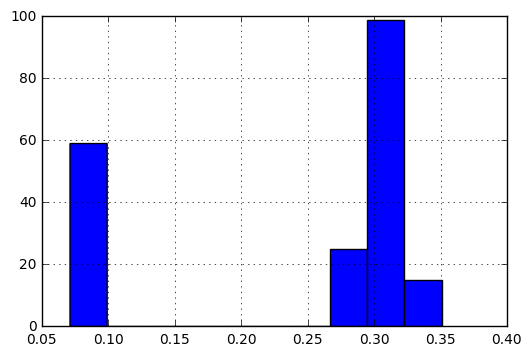

In [13]:
cm_df[cm_df['baits'] == 'M']['TSID_ratio'].hist()

#### Look at which subjects appear to have been falsely labeled as inherited disease when the data indicates that they were really run on TruSight One

In [16]:
cm_df[(cm_df['baits'] == 'P') & (cm_df['TSID_ratio'] < 0.9)].filter(regex=('subject|baits|TSID_ratio'))

,subject,baits,TSID_ratio
6,FPWB-0000-429L,P,0.000789
155,FPWB-0000-865H,P,0.000871
171,FPWB-0001-075V,P,0.000955
244,FPWB-0000-780R,P,0.000863
250,FPWB-0001-098N,P,0.000755
253,FPWB-0001-1042,P,0.000765
264,FPWB-0001-069O,P,0.000986
340,FPWB-0001-0820,P,0.001090


#### Add columns for summed coverage across all exons

#### Print summary stats for each exon across all female subjects

In [21]:
females_only = cm_df[cm_df['gender'] == 'F']
females_only.filter(regex=('Ex|Target|all_targets')).describe().T

,count,mean,std,min,25%,50%,75%,max
Ex1,177.0,590.322034,409.041678,22.0,244.0,529.0,916.0,1512.0
Ex2,177.0,95.322034,60.917075,4.0,43.0,92.0,133.0,301.0
Ex3,177.0,227.536723,133.241152,22.0,113.0,211.0,320.0,690.0
Ex4,177.0,357.604520,220.935129,31.0,156.0,336.0,538.0,898.0
Ex5,177.0,152.124294,82.711137,22.0,82.0,152.0,207.0,477.0
Ex6,177.0,250.276836,147.753200,19.0,134.0,235.0,347.0,683.0
Ex7,177.0,316.723164,219.247829,9.0,124.0,290.0,508.0,818.0
Ex8,177.0,286.644068,196.847867,11.0,126.0,275.0,454.0,721.0
Ex9-10,177.0,544.129944,378.681625,15.0,246.0,478.0,856.0,1336.0
Ex11,177.0,245.796610,143.765843,41.0,146.0,242.0,306.0,1321.0


In [22]:
females_only.filter(regex=('Target36|all_targets')).describe().T

,count,mean,std,min,25%,50%,75%,max
Target36,177.0,101.146893,83.130790,0.0,30.0,102.0,175.0,298.0
all_targets,177.0,18040.276836,10541.244432,1801.0,8733.0,16837.0,25493.0,50194.0
